## Nota: Ideal para conjuntos pequeños

## Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Leer dataset

In [2]:
dataset = pd.read_csv('../Scrapping/Datos.csv')
dataset.head()

,Nombre,Calidad,Recomiendan,Dificultad
0,,0.0,NaN,10.0
1,Aunque Me Borren Seguiré *A Todos Los Pseudoal...,3.8,18.0,5.8
2,Fanny Adan Sosa,8.5,86.0,1.9
3,Rafael Aguilar García,7.7,82.0,2.4
4,Fernando Aguilar Sanchez,8.4,85.0,1.9


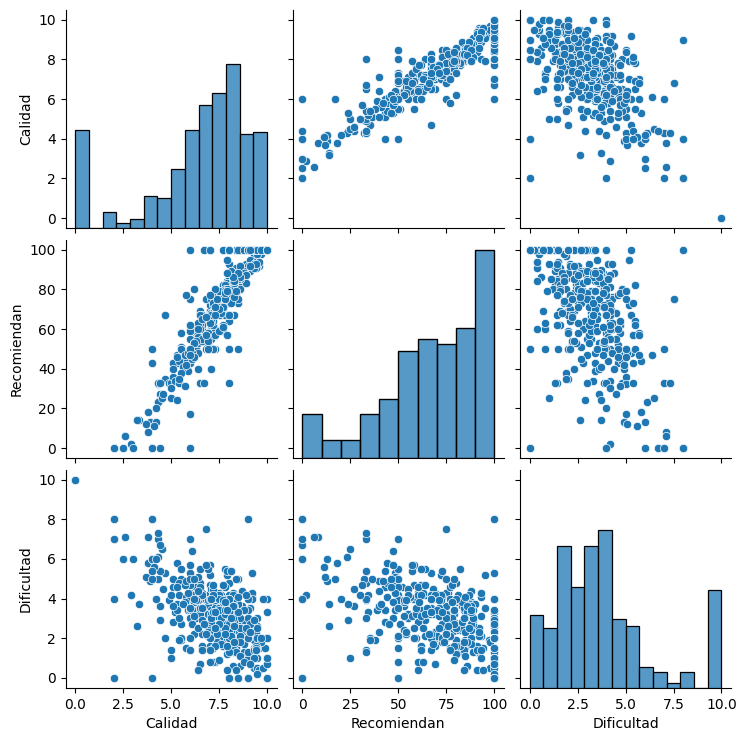

In [3]:
import seaborn as sns

sns.pairplot(dataset)

## Determinar rasgos

In [4]:
x = dataset.iloc[:, [1,3]].values
x

array([[ 0. , 10. ],
       [ 3.8,  5.8],
       [ 8.5,  1.9],
       [ 7.7,  2.4],
       [ 8.4,  1.9],
       [ 8. ,  2. ],
       [ 9.6,  1.5],
       [ 8.4,  2.4],
       [ 8.8,  1.3],
       [ 7.9,  2. ],
       [ 7. ,  1.6],
       [ 5.3,  5.8],
       [ 6.5,  4. ],
       [ 8. ,  1.5],
       [ 4.7,  5.3],
       [ 7. ,  4.2],
       [ 0. , 10. ],
       [ 6.3,  4.6],
       [ 2.5,  6. ],
       [ 7.5,  2.3],
       [10. ,  3.3],
       [ 8.2,  3.8],
       [ 0. , 10. ],
       [ 7.3,  3.6],
       [ 8.4,  1.5],
       [ 7. ,  5.2],
       [ 0. , 10. ],
       [ 8. ,  0. ],
       [ 7. ,  2. ],
       [ 4.7,  2. ],
       [ 6.8,  4.2],
       [ 4.9,  3.9],
       [ 8.6,  2.6],
       [ 8. ,  3.1],
       [ 0. , 10. ],
       [ 6.3,  4.1],
       [ 5.7,  4.9],
       [ 8.3,  1.3],
       [ 8.4,  1.5],
       [ 8.5,  1.8],
       [ 8.7,  3.6],
       [ 0. , 10. ],
       [ 0. , 10. ],
       [ 4.4,  2.9],
       [ 8. ,  1.9],
       [10. ,  4. ],
       [ 8.2,  4.3],
       [ 8.7,

## Dendrogramas

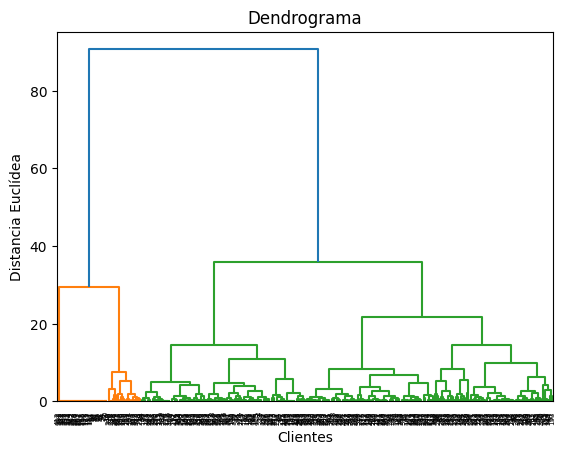

In [5]:
import scipy.cluster.hierarchy as sch

# Dendograma
dendrogram = sch.dendrogram(sch.linkage(x, method='ward'))
plt.title('Dendrograma')
plt.xlabel('Clientes')
plt.ylabel('Distancia Euclídea')
plt.show()

# TODO: ¿Cuántos clusters se pueden identificar? 2

## Seguir con proceso de clustering

In [6]:
from sklearn.cluster import AgglomerativeClustering

# Crear el modelo
hc = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(x)

y_hc


array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

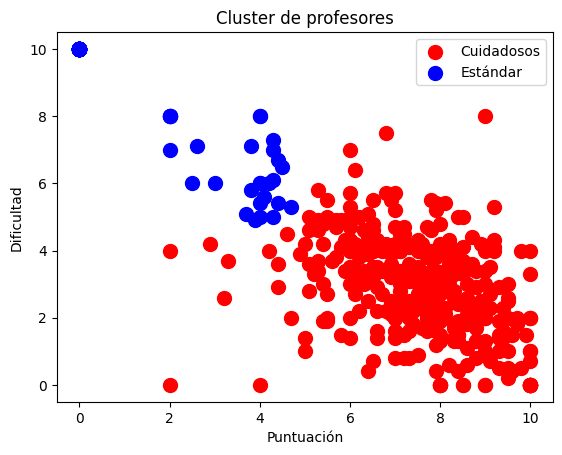

In [7]:
# Toma las coordenadas de los clientes y los agrupa en 5 grupos
plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'red', label = 'Cuidadosos')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'blue', label = 'Estándar')
plt.title('Cluster de profesores')
plt.xlabel('Puntuación')
plt.ylabel('Dificultad')
plt.legend()
plt.show()